Import Libraries and Load Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed severity dataset
file_path = r'D:\ET6-CDSP-group-13-repo\2_data_preparation\processed\crisis_severity_2019-24.csv'
df = pd.read_csv(file_path)
df.head()

,ISO3,Year,severity_score,crisis_flag
0,AFG,2020,4.6,1
1,AFG,2021,4.7,1
2,AFG,2022,4.5,1
3,AFG,2023,4.4,1
4,AFG,2024,4.4,1


## Research Questions
- Does severity score predict crisis flag?
- How does severity vary by year and country?
- Are there significant trends in severity over time?

Prepare and Summarize Data

In [10]:
# Check for missing values and duplicates
print(df.isnull().sum())
print(df.duplicated(subset=['ISO3', 'Year']).sum())

# Basic statistics
print(df.describe())

ISO3              0
Year              0
severity_score    0
crisis_flag       0
dtype: int64
0
              Year  severity_score  crisis_flag
count   400.000000      400.000000   400.000000
mean   2022.187500        3.027500     0.677500
std       1.400803        0.945292     0.468019
min    2020.000000        1.100000     0.000000
25%    2021.000000        2.300000     0.000000
50%    2022.000000        3.000000     1.000000
75%    2023.000000        3.800000     1.000000
max    2024.000000        5.000000     1.000000


In [11]:
print(df.duplicated(subset=['ISO3', 'Year']).sum())

# Basic statistics
print(df.describe())

0
              Year  severity_score  crisis_flag
count   400.000000      400.000000   400.000000
mean   2022.187500        3.027500     0.677500
std       1.400803        0.945292     0.468019
min    2020.000000        1.100000     0.000000
25%    2021.000000        2.300000     0.000000
50%    2022.000000        3.000000     1.000000
75%    2023.000000        3.800000     1.000000
max    2024.000000        5.000000     1.000000


In [12]:
import statsmodels.api as sm

X = df['severity_score']
y = df['crisis_flag']

X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            crisis_flag   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Aug 2025   Pseudo R-squ.:                   1.000
Time:                        13:06:43   Log-Likelihood:            -7.9695e-06
converged:                      False   LL-Null:                       -251.50
Covariance Type:            nonrobust   LLR p-value:                2.124e-111
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -749.1900   1.74e+04     -0.043      0.966   -3.48e+04    3.33e+04
severity_score   305.8341   7085.672      0.043      

c:\Users\MHSN\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
import scipy.stats as stats

groups = [df[df['Year'] == year]['severity_score'].dropna() for year in df['Year'].unique()]
anova_result = stats.f_oneway(*groups)
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA F-statistic: 1.678154674891073
ANOVA p-value: 0.15420962103691527


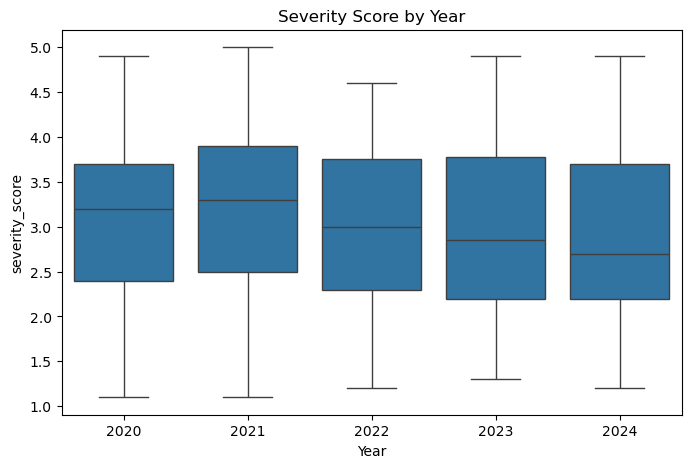

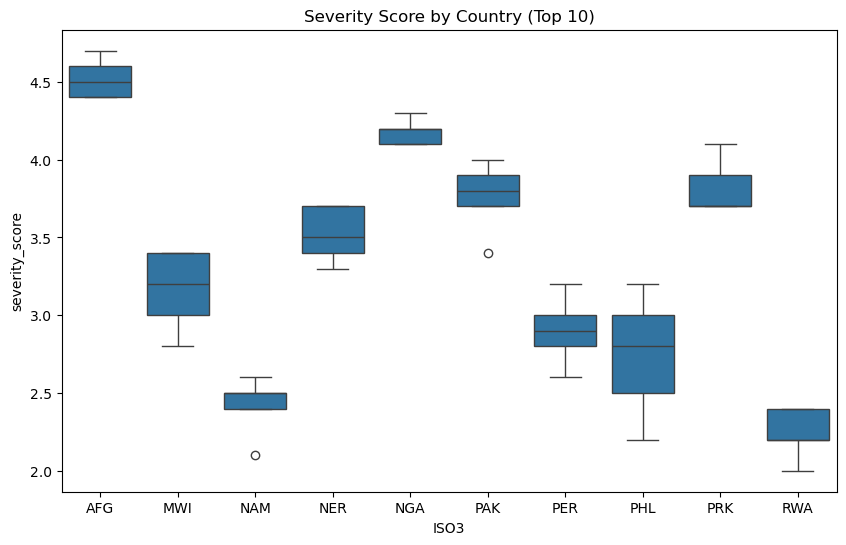

In [14]:
# Severity score by year
plt.figure(figsize=(8, 5))
sns.boxplot(x='Year', y='severity_score', data=df)
plt.title('Severity Score by Year')
plt.show()

# Severity score by country (top 10)
top_countries = df['ISO3'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='ISO3', y='severity_score', data=df[df['ISO3'].isin(top_countries)])
plt.title('Severity Score by Country (Top 10)')
plt.show()

## Interpretation and Findings

### 1. Data Quality
- **No missing values** in any column (`ISO3`, `Year`, `severity_score`, `crisis_flag`).
- **No duplicate country-year rows** detected.
- The dataset covers 400 country-year observations from 2020 to 2024.

### 2. Severity Score and Crisis Flag
- **Severity scores** range from 1.1 to 5.0, with a mean of 3.03.
- **Crisis flag** is set to `1` for severity scores ≥ 2.5, and `0` otherwise.
- About **68% of country-years are flagged as crisis** (`crisis_flag = 1`).

### 3. Logistic Regression (Severity Score → Crisis Flag)
- The model failed to converge and shows **complete separation**. This means the severity score perfectly predicts the crisis flag (as expected, since the flag is directly derived from the score).
- **Limitation:** Logistic regression is not informative here because the relationship is deterministic, not statistical.

### 4. Severity Trends by Year (ANOVA)
- **ANOVA F-statistic:** 1.68
- **ANOVA p-value:** 0.15
- **Interpretation:** There is **no statistically significant difference** in severity scores across years (p > 0.05).

### 5. Summary of Key Findings
- **Severity score is a perfect predictor of crisis flag** due to how the flag is defined.
- **No significant trend in severity scores over time** (2020–2024).
- **Most country-years are in crisis**, with severity scores generally above the threshold.

### 6. Limitations
- The crisis flag is not independent of severity score, so predictive modeling is not meaningful.
- The analysis does not account for other factors (e.g., region, crisis type).
- ANOVA only tests for differences in means, not other distributional changes.

---

**Next Steps:**  
Consider exploring other variables or external datasets for deeper insights, such as comparing severity with conflict events